In [18]:
import fastf1

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np

In [19]:
fastf1.Cache.enable_cache('Cache')

In [20]:
year = 2023
gp = 'Brazil'
event = 'Q'

In [21]:
session = fastf1.get_session(year, gp, event)
session.load()

core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
c:\Users\larsl\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\larsl\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
c:\Users\larsl\AppData\Local\Programs\

In [22]:
lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

In [23]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

In [24]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

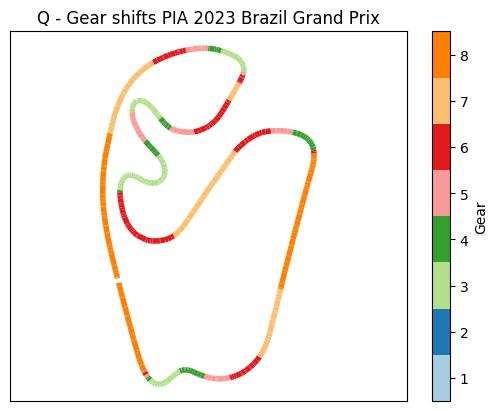

In [28]:
cmap = mpl.colormaps.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = f'{str(event)} - Gear shifts {str(lap["Driver"])} {str(year)} {str(gp)} Grand Prix'

plt.title(title)

cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))

plt.savefig(f'Figures/{title}')

plt.show()